**Resampling Methods**

[ISLR Chapter 5](https://link.springer.com/chapter/10.1007/978-1-4614-7138-7_5)

This involves repeated drawing samples from a training set and refitting a model of interest on each sample to obtain additional info about the fitted model. One example is for estimating the variability of a linear regression fit:
- Repeatedly draw different samples from the training data
- Fit a linear regression to each new sample
- Then examine the extent to which the resulting fits differ
This allows us to obtain info that wouldn't be available from fitting the model only once using the original training sample.

Resampling approaches can be computationally expensive, but computing power currently makes resampling less prohibitive. Two of the most common methods are *cross-validation* and *bootstrap*.

**Cross-validation**:
Estimate the test error associated with a given statistical learning method for model assessment (process of evaluating a model's performance) and model selection (select appropriate level of flexibility)

**Bootstrap**:
Used in several contexts, most commonly to provide a measure of accuracy of a parameter estimate or of a given statistical learning method.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Code formatting Jupyter black
%load_ext nb_black

<IPython.core.display.Javascript object>

[Writing math symbols in markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)

[quick reference](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)

# Cross-Validation

Remember that there's a distinction between the *test error rate* and the *training error rate* (discussed in Chapter 2.

In Chapter 6, they discuss how to make a mathematical adjustment ot the training error rate in order to estimate the error rate. Here, they estimate the test error rate by *holding out* a subset of the training observations from the fitting process.

In sections 5.1.1-5.1.4, they look at an example of performing regression with a quantitative response. In Section 5.1.5, they consider the case of classification with a qualitative response.

## The validation set approach

This is just holding out a set of data (e.g. using train_test_split from scikit-learn).

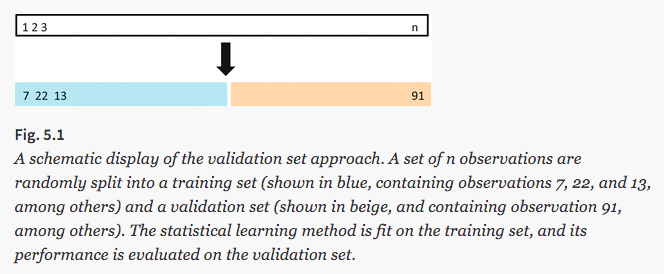

The resulting validation set error-rate--typically assessed using MSE (mean squared error) in the case of a quantitative response--provides an estimate of the test error rate.

The `Auto` dataset can be used to illustrate the validation set approach. From Chapter 3, we saw that there was a non-linear relationship between `mpg` and `horsepower`, and that a model that predicts `mpg` using `horsepower` and `horsepower`^2 gives better results than a model that uses only a linear term. It's natural to wonder if higher-order fits could give even better results. One way to approach this is by looking at the p-values associated with a cubic-term and higher-order polynomial terms in linear regression. The other approach is using the validation method.

The validation set error rates that result from fitting various regression models on the training sample and evaluating their performance on the validation sample, using MSE as a measure of validation set error, are shown in the left-hand panel of Figure 5.2.

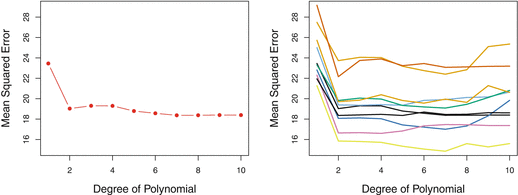

The validation set MSE for the quadratic fit is considerably smaller than for the linear fit. However, the validation set MSE for the cubic fit is actually slightly larger than for the quadratic fit. This implies that including a cubic term in the regression does not lead to better prediction than simply using a quadratic term.

The right side shows 10 different ways of splitting into training and validation. They all show that the quadratic term is the lowest but they each have a different baseline MSE.

The validation set approach is conceptually simple and easy to implement, but it has two potential drawbacks:

1. As shown on the right panel of figure 5.2, the validation estimate of the test error rate can be highly variable, depending on precisely which observations are included in the training set versus validation set.

2. In the validation approach, only a subset of the observations--those that are included in the training set rather than in the validation set--are used to fit the model. Since statistical methods tend to perform worse when trained on *fewer* observations, this suggests that the validation set error rate may tend to *overestimate* the test error rate for the model fit on the entire data set.

In the coming sections, we will present *cross-validation*, a refinement of the validation set approach that addresses these two issues.


# [bottom of notebook]